<div dir=rtl>

نام و نام‌خانوادگی: حامد آجورلو  

شماره دانشجویی: 97101167

----



<div dir=rtl>

#  آزمايش اول: پياده‌‌‌سازی الگوريتم YOLO

----



<div dir=rtl>


در اين آزمايش می‌خواهيم با نحوه پیاده‌سازی الگوریتم YOLO برای تشخیص آشنا شویم.


<div dir=rtl>

## 1.	آشنایی با دیتاست

ديتاست را دانلود کنيد و اولين نمونه آموزش آن را به همراه کادرها نمايش دهيد.

ابتدا ۳ بخش زیر را اجرا کنید.

سپس با استفاده از فایل‌های .txt و تصاویر موجود در فولدر JPEGImages اولین تصویری که اطلاعات کادرهای آن در فایل train.txt آمده است را به همراه کادرها و لیبل شیء داخل تصویر نمایش دهید.


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt    # for plotting the images
import cv2 
import numpy as np

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar

!tar xvf VOCtrainval_06-Nov-2007.tar
!tar xvf VOCtest_06-Nov-2007.tar

!rm VOCtrainval_06-Nov-2007.tar
!rm VOCtest_06-Nov-2007.tar

Streaming output truncated to the last 5000 lines.
VOCdevkit/VOC2007/JPEGImages/000725.jpg
VOCdevkit/VOC2007/JPEGImages/000727.jpg
VOCdevkit/VOC2007/JPEGImages/000732.jpg
VOCdevkit/VOC2007/JPEGImages/000734.jpg
VOCdevkit/VOC2007/JPEGImages/000735.jpg
VOCdevkit/VOC2007/JPEGImages/000736.jpg
VOCdevkit/VOC2007/JPEGImages/000737.jpg
VOCdevkit/VOC2007/JPEGImages/000741.jpg
VOCdevkit/VOC2007/JPEGImages/000743.jpg
VOCdevkit/VOC2007/JPEGImages/000744.jpg
VOCdevkit/VOC2007/JPEGImages/000745.jpg
VOCdevkit/VOC2007/JPEGImages/000747.jpg
VOCdevkit/VOC2007/JPEGImages/000749.jpg
VOCdevkit/VOC2007/JPEGImages/000751.jpg
VOCdevkit/VOC2007/JPEGImages/000757.jpg
VOCdevkit/VOC2007/JPEGImages/000758.jpg
VOCdevkit/VOC2007/JPEGImages/000759.jpg
VOCdevkit/VOC2007/JPEGImages/000762.jpg
VOCdevkit/VOC2007/JPEGImages/000765.jpg
VOCdevkit/VOC2007/JPEGImages/000766.jpg
VOCdevkit/VOC2007/JPEGImages/000769.jpg
VOCdevkit/VOC2007/JPEGImages/000773.jpg
VOCdevkit/VOC2007/JPEGImages/000775.jpg
VOCdevkit/VOC2007/JPEGImages/

In [ ]:
import argparse
import xml.etree.ElementTree as ET
import os

parser = argparse.ArgumentParser(description='Build Annotations.')
parser.add_argument('dir', default='..', help='Annotations.')

sets = [('2007', 'train'), ('2007', 'val'), ('2007', 'test')]

classes_num = {'aeroplane': 0, 'bicycle': 1, 'bird': 2, 'boat': 3, 'bottle': 4, 'bus': 5,
               'car': 6, 'cat': 7, 'chair': 8, 'cow': 9, 'diningtable': 10, 'dog': 11,
               'horse': 12, 'motorbike': 13, 'person': 14, 'pottedplant': 15, 'sheep': 16,
               'sofa': 17, 'train': 18, 'tvmonitor': 19}


def convert_annotation(year, image_id, f):
    in_file = os.path.join('VOCdevkit/VOC%s/Annotations/%s.xml' % (year, image_id))
    tree = ET.parse(in_file)
    root = tree.getroot()

    for obj in root.iter('object'):
        difficult = obj.find('difficult').text
        cls = obj.find('name').text
        classes = list(classes_num.keys())
        if cls not in classes or int(difficult) == 1:
            continue
        cls_id = classes.index(cls)
        xmlbox = obj.find('bndbox')
        b = (int(xmlbox.find('xmin').text), int(xmlbox.find('ymin').text),
             int(xmlbox.find('xmax').text), int(xmlbox.find('ymax').text))
        f.write(' ' + ','.join([str(a) for a in b]) + ',' + str(cls_id))

In [ ]:
for year, image_set in sets:
  print(year, image_set)
  with open(os.path.join('VOCdevkit/VOC%s/ImageSets/Main/%s.txt' % (year, image_set)), 'r') as f:
      image_ids = f.read().strip().split()
  with open(os.path.join("VOCdevkit", '%s_%s.txt' % (year, image_set)), 'w') as f:
      for image_id in image_ids:
          f.write('%s/VOC%s/JPEGImages/%s.jpg' % ("VOCdevkit", year, image_id))
          convert_annotation(year, image_id, f)
          f.write('\n')

2007 train
2007 val
2007 test


In [ ]:
### read txt file 

train_datasets = []

with open(os.path.join("VOCdevkit", '2007_train.txt'), 'r') as f:
    train_datasets = train_datasets + f.readlines()


X_train = []
Y_train = []

## X_train: image_path, Y_train: information of boxes
for item in train_datasets:
  ITEM0 = item.split(' ')[0]
  X_train = X_train + [ITEM0]
  ITEM1 = item.split(' ')[1:]
  Y_train = Y_train + [ITEM1]




In [ ]:
X_train

['VOCdevkit/VOC2007/JPEGImages/000012.jpg',
 'VOCdevkit/VOC2007/JPEGImages/000017.jpg',
 'VOCdevkit/VOC2007/JPEGImages/000023.jpg',
 'VOCdevkit/VOC2007/JPEGImages/000026.jpg',
 'VOCdevkit/VOC2007/JPEGImages/000032.jpg',
 'VOCdevkit/VOC2007/JPEGImages/000033.jpg',
 'VOCdevkit/VOC2007/JPEGImages/000034.jpg',
 'VOCdevkit/VOC2007/JPEGImages/000035.jpg',
 'VOCdevkit/VOC2007/JPEGImages/000036.jpg',
 'VOCdevkit/VOC2007/JPEGImages/000042.jpg',
 'VOCdevkit/VOC2007/JPEGImages/000044.jpg',
 'VOCdevkit/VOC2007/JPEGImages/000047.jpg',
 'VOCdevkit/VOC2007/JPEGImages/000048.jpg',
 'VOCdevkit/VOC2007/JPEGImages/000061.jpg',
 'VOCdevkit/VOC2007/JPEGImages/000064.jpg',
 'VOCdevkit/VOC2007/JPEGImages/000066.jpg',
 'VOCdevkit/VOC2007/JPEGImages/000073.jpg',
 'VOCdevkit/VOC2007/JPEGImages/000077.jpg',
 'VOCdevkit/VOC2007/JPEGImages/000078.jpg',
 'VOCdevkit/VOC2007/JPEGImages/000083.jpg',
 'VOCdevkit/VOC2007/JPEGImages/000089.jpg',
 'VOCdevkit/VOC2007/JPEGImages/000091.jpg',
 'VOCdevkit/VOC2007/JPEGImages/0

In [ ]:
Y_train

[['156,97,351,270,6\n'],
 ['185,62,279,199,14', '90,78,403,336,12\n'],
 ['9,230,245,500,1',
  '230,220,334,500,1',
  '2,1,117,369,14',
  '3,2,243,462,14',
  '225,1,334,486,14\n'],
 ['90,125,337,212,6\n'],
 ['104,78,375,183,0',
  '133,88,197,123,0',
  '195,180,213,229,14',
  '26,189,44,238,14\n'],
 ['9,107,499,263,0', '421,200,482,226,0', '325,188,411,223,0\n'],
 ['116,167,360,400,18', '141,153,333,229,18\n'],
 ['1,96,191,361,14', '218,98,465,318,14\n'],
 ['27,79,319,344,11\n'],
 ['263,32,500,295,18', '1,36,235,299,18\n'],
 ['1,1,370,330,8', '99,101,312,213,7\n'],
 ['15,1,459,312,6', '439,170,487,230,8\n'],
 ['58,107,291,465,2', '2,1,302,500,14\n'],
 ['274,11,437,279,3', '184,214,281,252,3\n'],
 ['1,23,451,500,2\n'],
 ['209,187,228,230,14', '242,182,274,259,14', '269,188,295,259,14\n'],
 ['121,143,375,460,15',
  '2,154,64,459,15',
  '270,155,375,331,3',
  '22,143,146,500,14\n'],
 ['240,1,500,333,7', '2,1,306,333,7\n'],
 ['15,75,475,412,11', '94,41,437,238,11\n'],
 ['109,33,447,309,6',
 

In [ ]:
#### function to return label(cat,dog, ....) and x,y,w,h for each image

def read_raw(image_path, label, classes_num):
    boxes = []
    class_label = []

    image = plt.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    img = X_train.index(image_path)
    frame = label[img]

    for i in range(len(frame)):
      box=[0,0,0,0]

      box[0] = int(frame[i].split(',')[0])
      box[1] = int(frame[i].split(',')[1])
      box[2] = int(frame[i].split(',')[2])
      box[3] = int(frame[i].split(',')[3])

      class_label.append(int(frame[i].split(',')[4]))

      boxes = boxes + [box]

    keys = list(classes_num.keys())
    values = list(classes_num.values())

    for i in range(len(class_label)):
      j = values.index(class_label[i])
      class_label[i] = keys[j]

    image_copy = image.copy()
    for i in range(len(boxes)):
      box = boxes[i]
      cv2.rectangle(image_copy,(box[0],box[1]),(box[2],box[3]),(0,255,0),3)
    plt.figure(figsize=(20,10))
    plt.imshow(image_copy)
    plt.axis('off')
    plt.show()






    return image, class_label, boxes

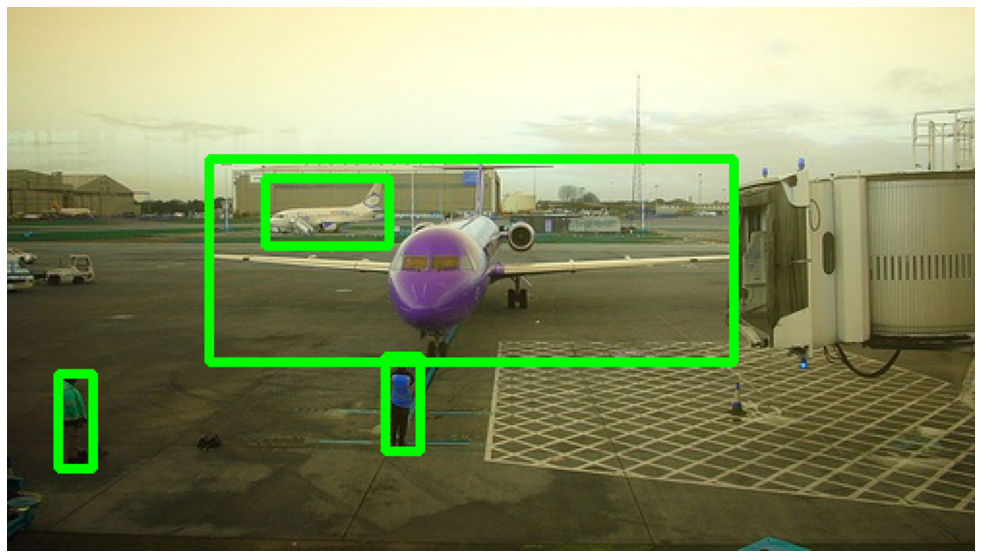

In [ ]:
### show image + class label + boxes on image


image_path =   'VOCdevkit/VOC2007/JPEGImages/000032.jpg'

read_raw(image_path, Y_train, classes_num);







خروجی مطلوب:

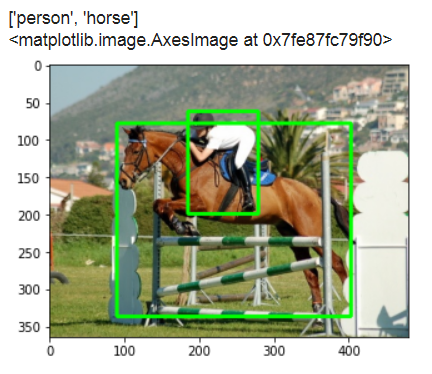

<div dir=rtl>

## 2.	تشکیل داده‌های آموزش - ساخت تنسور برای هر تصویر

برای اين آزمايش، بخش‌بندی را به‌صورت S=7 و B=1 در نظر بگيريد. هر شیء در تصوير به سلولی که مرکز شیء در آن واقع است، اختصاص می‌يابد. به‌عنوان مثال در شکل زير، سلول‌های مشخص‌شده با رنگ زرد نشان‌دهنده سلول‌های شامل مراکز کادرهای اصلی می‌باشند.

براين اساس به شکل زير داده‌های آموزشی را تشکيل دهيد:
يک ماتريس با ابعاد 7×7×m تشکيل دهيد و همه مقادير اوليه آن را صفر قرار دهيد(m را براساس اطلاعات ديتاست و آزمايش تعيين کنيد.)

برای هر يک از تصاوير موجود در ديتاست، فايل annotation را خوانده و موقعيت مرکز هر شیء را برای هر يک از اشيا واقع در تصوير محاسبه کنيد. براساس مرکز شیء، سلول مربوط به آن را پيدا کرده و براساس آن بردار خروجی مناسب سلول را تکميل کنيد:
*	موقعيت مرکز شیء (x,y)
*	ابعاد کادر (w,h)
*	ضريب اطمينان 
*	احتمال کلاس به شرط وجود شیء


In [ ]:
### make dataset

def make_dataset(image_path, label):
    img , class_labels , boxes = read_raw(image_path, Y_train , classes_num)

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_h, image_w = image.shape[0:2]
    image = cv2.resize(image, (448, 448))
    image = image / 255.

    label_matrix = np.zeros([7, 7, 30])

    for i in range(7):
      for j in range(7):
        for k in range(len(boxes)):
          box = boxes[k]

          xmin = box[0]/image_w
          ymin = box[1]/image_h
          xmax = box[2]/image_w
          ymax = box[3]/image_h
          xcenter = (xmin+xmax)/2
          ycenter = (ymin+ymax)/2

          w = (xmax-xmin)
          h = (ymax-ymin)

          num = class_labels[k]

          centerx = int(7 * xcenter) 
          centery = int(7 * ycenter)

          if(label_matrix[i,j,4]!=1 ):
            label_matrix[i,j,0]=  7*xcenter - centerx 
            label_matrix[i,j,1]=  7*ycenter - centery
            label_matrix[i,j,2]= w
            label_matrix[i,j,3]= h
            label_matrix[i,j,4]=1
            l = classes_num[class_labels[k]]
            label_matrix[i,j,10+i] = 1
    print(class_labels)
    return image, label_matrix

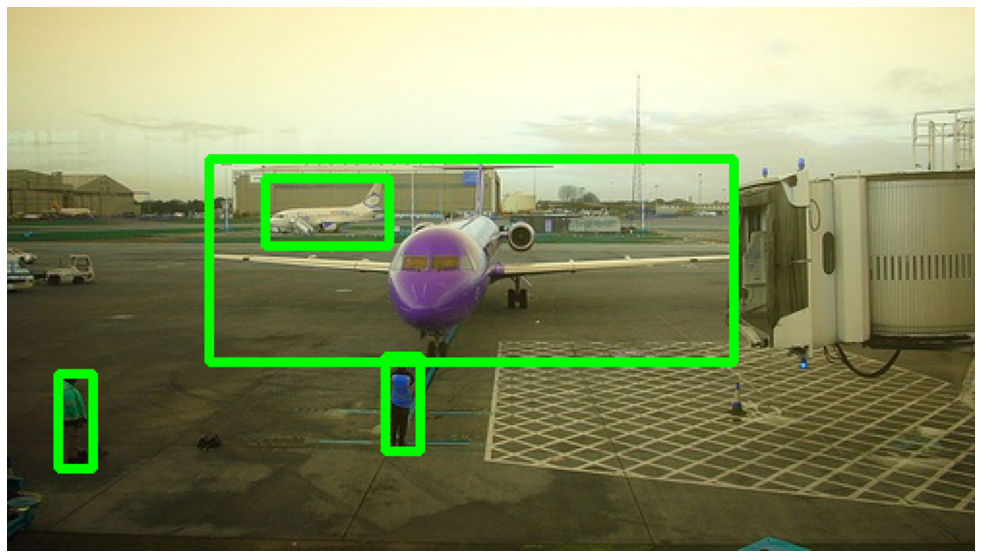

['aeroplane', 'aeroplane', 'person', 'person']


In [ ]:
image , Label_matrix = make_dataset(image_path, Y_train);


In [ ]:
import pandas as pd
df = pd.DataFrame(Label_matrix[3][3])
df.head()

,0
0,0.353000
1,0.250890
2,0.542000
3,0.373665
4,1.000000
